# скрипт #04
<hr>

# страндарные библиотеки для работы

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

from IPython.core.display import HTML

In [2]:
# sklearn packages
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

In [3]:
fileNames=['rawDataFull1001.csv', 'rawDataFull1003.csv', 
            'rawDataFull1004.csv', 'rawDataFull1005.csv',
            'rawDataFull1006.csv']
path='../ITC RUSAL/baths/'
bathNumber=['1001','1003','1004','1005','1006']

In [4]:
# data[0] - 1001, 1 - 1003, 2 - 1004, 3 - 1005, 4 - 1006
data=[]
for dataset in fileNames:
    data.append(pd.read_csv(path+dataset))

In [5]:
# удалить столбец "KOL4", т.к. он пустой по всех 5ти наборах
for i in range(5):
    data[i]=data[i].drop(columns=['KOL4'])

##  нормализуем в $[0,1]$

In [6]:
dataScaled=[]
for i in range(5):
    x=data[i].values
    scaler = preprocessing.MinMaxScaler()
    x_scaled = scaler.fit_transform(x)
    dataScaled.append( pd.DataFrame(x_scaled, columns=data[i].columns.values) )

## заполним пропусти средним, медианой и с помощью метода kNN: k=2,3,5

In [7]:
dataScImpMean=[]
for i in range(5):
    impMean = SimpleImputer(missing_values=np.nan, strategy='mean')
    dataScImpMean.append( pd.DataFrame(impMean.fit_transform(dataScaled[i]), columns=dataScaled[i].columns.values) )

dataScImpMedian=[]
for i in range(5):
    impMedian = SimpleImputer(missing_values=np.nan, strategy='median')
    dataScImpMedian.append( pd.DataFrame(impMedian.fit_transform(dataScaled[i]), columns=dataScaled[i].columns.values) )

dataScImpMKNN2=[]
for i in range(5):
    impKNN2 = KNNImputer(missing_values=np.nan, n_neighbors=2)
    dataScImpMKNN2.append( pd.DataFrame(impKNN2.fit_transform(dataScaled[i]), columns=dataScaled[i].columns.values) )

dataScImpMKNN3=[]
for i in range(5):
    impKNN3 = KNNImputer(missing_values=np.nan, n_neighbors=3)
    dataScImpMKNN3.append( pd.DataFrame(impKNN3.fit_transform(dataScaled[i]), columns=dataScaled[i].columns.values) )

dataScImpMKNN5=[]
for i in range(5):
    impKNN5 = KNNImputer(missing_values=np.nan, n_neighbors=5)
    dataScImpMKNN5.append( pd.DataFrame(impKNN5.fit_transform(dataScaled[i]), columns=dataScaled[i].columns.values) )

## массив 5-в-1 c пропусками и заполненный

In [8]:
data5in1=dataScaled[0].copy()
for i in range(4):
    data5in1=data5in1.append(dataScaled[i+1], ignore_index=True)
data5in1.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Columns: 31 entries, AE1 to NETOUT3
dtypes: float64(31)
memory usage: 442.1 KB


In [9]:
impMean = SimpleImputer(missing_values=np.nan, strategy='mean')
data5ni1Mean=pd.DataFrame(impMean.fit_transform(data5in1), columns=data5in1.columns.values)
impMedian = SimpleImputer(missing_values=np.nan, strategy='median')
data5ni1Median=pd.DataFrame(impMedian.fit_transform(data5in1), columns=data5in1.columns.values)
impKNN2 = KNNImputer(missing_values=np.nan, n_neighbors=2)
data5ni1KNN2=pd.DataFrame(impKNN2.fit_transform(data5in1), columns=data5in1.columns.values)
impKNN3 = KNNImputer(missing_values=np.nan, n_neighbors=3)
data5ni1KNN3=pd.DataFrame(impKNN3.fit_transform(data5in1), columns=data5in1.columns.values)
impKNN5 = KNNImputer(missing_values=np.nan, n_neighbors=5)
data5ni1KNN5=pd.DataFrame(impKNN5.fit_transform(data5in1), columns=data5in1.columns.values)

# дендограммы

In [10]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [14]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    sch.dendrogram(linkage_matrix, **kwargs)

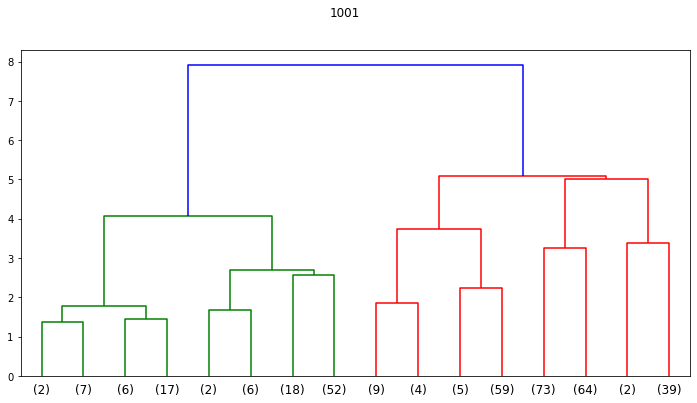

In [20]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(dataScImpMean[0].values)
fig, ax = plt.subplots(figsize=(12,6))
fig.suptitle(bathNumber[0])
plot_dendrogram(model, truncate_mode='level', p=3)
plt.show()

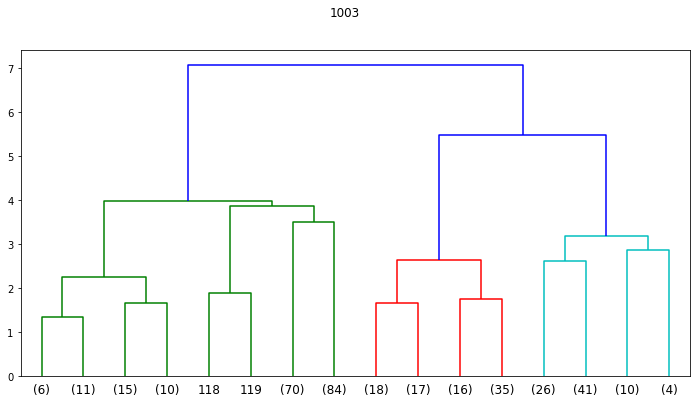

In [21]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(dataScImpMean[1].values)
fig, ax = plt.subplots(figsize=(12,6))
fig.suptitle(bathNumber[1])
plot_dendrogram(model, truncate_mode='level', p=3)
plt.show()

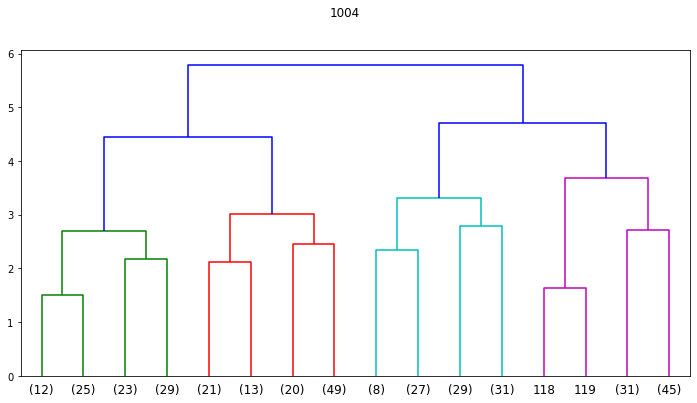

In [22]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(dataScImpMean[2].values)
fig, ax = plt.subplots(figsize=(12,6))
fig.suptitle(bathNumber[2])
plot_dendrogram(model, truncate_mode='level', p=3)
plt.show()

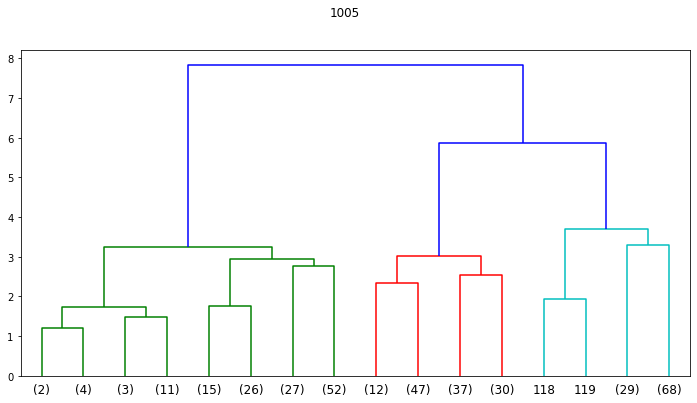

In [23]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(dataScImpMean[3].values)
fig, ax = plt.subplots(figsize=(12,6))
fig.suptitle(bathNumber[3])
plot_dendrogram(model, truncate_mode='level', p=3)
plt.show()

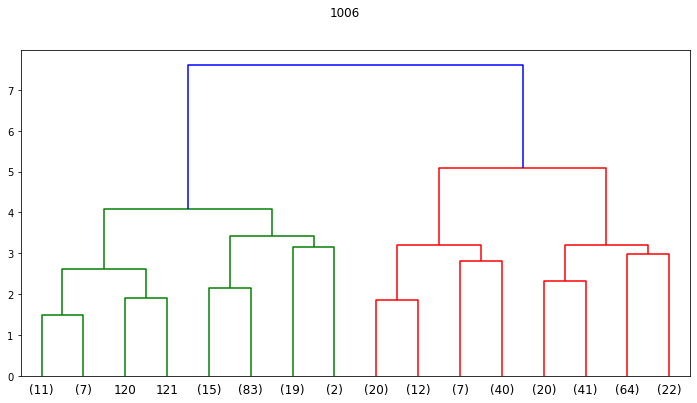

In [24]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(dataScImpMean[4].values)
fig, ax = plt.subplots(figsize=(12,6))
fig.suptitle(bathNumber[4])
plot_dendrogram(model, truncate_mode='level', p=3)
plt.show()

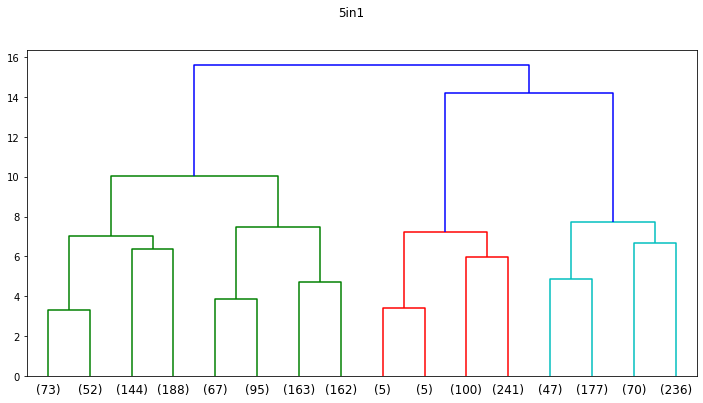

In [25]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(data5ni1Mean.values)
fig, ax = plt.subplots(figsize=(12,6))
fig.suptitle('5in1')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.show()